In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn

In [3]:
# load dataset
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train[1].shape

(28, 28)

In [7]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

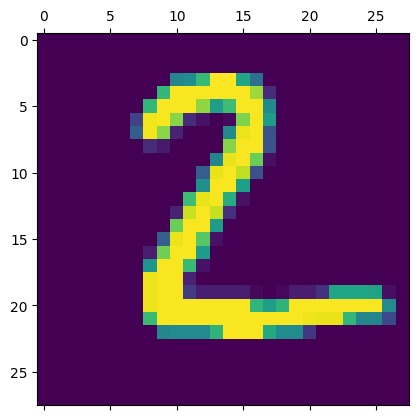

In [10]:
plt.matshow(x_test[1])

In [11]:
# feature scaling
# normalize
x_train = (x_train / 255)

In [13]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
x_test = (x_test / 255)

In [15]:
x_test[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
# flattern the images into 28*28 = 784
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

In [17]:
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
x_train.shape

(60000, 784)

In [19]:
model = keras.Sequential()
model.add(Dense(50,activation='relu',input_dim=(784)))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
model.fit(
    x_train,
    to_categorical(y_train),
    epochs=5,
    batch_size=32
)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2918 - accuracy: 0.9157
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1403 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1039 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0835 - accuracy: 0.9741
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0689 - accuracy: 0.9787


In [22]:
# evalute
model.evaluate(
    x_test,
    to_categorical(y_test)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9718


[0.09532146900892258, 0.9718000292778015]

In [23]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [24]:
pred

array([[4.6120620e-01, 6.7300227e-04, 9.5382237e-01, ..., 9.9997151e-01,
        1.9551480e-01, 4.9313593e-01],
       [3.0436194e-02, 9.9565154e-01, 9.9999750e-01, ..., 6.4058142e-08,
        5.6810284e-01, 9.7518932e-04],
       [5.3451746e-03, 9.9871099e-01, 1.4052570e-01, ..., 4.9292451e-01,
        1.5076560e-01, 3.1512356e-03],
       ...,
       [8.9406641e-04, 3.2530588e-03, 1.9055521e-02, ..., 9.7467494e-01,
        9.8290843e-01, 9.9532241e-01],
       [1.3842262e-01, 1.2628183e-02, 4.5505578e-05, ..., 1.2705118e-03,
        9.9449068e-01, 2.0461761e-05],
       [9.6496862e-01, 1.3347733e-03, 5.0598961e-01, ..., 3.7667003e-05,
        1.3700345e-03, 8.2432721e-03]], dtype=float32)

In [25]:
np.argmax(pred[1])

2

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth Values')

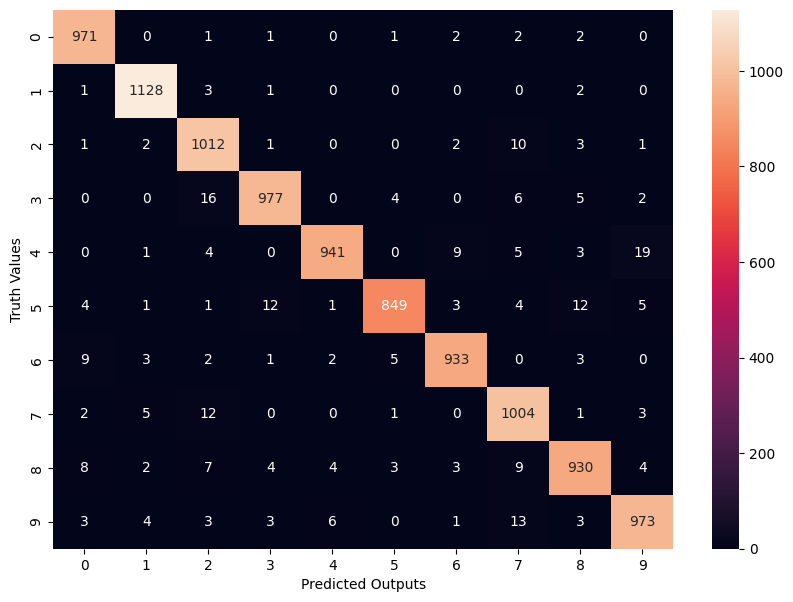

In [27]:
y_pred = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]
con_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
seaborn.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('Truth Values')